In [1]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
path = "dataset/train/"
path_test = "dataset/test/"
files = os.listdir(path)[:20]
files_test = os.listdir(path_test)[:20]
print("Detected train classes : ",files)
print("Detected test classes : ",files_test)


#classes={'1':0, '2':1, '3':2, '4':3, '5':4, '6':5, '7':6, '8':7, '9':8, '10':9, '11':10, '12':11, '25':12, '38':13, '51':14,
        '64':15, '77':16, '90':17, '93':18, '105':19}

Detected train classes :  ['1', '10', '105', '11', '12', '2', '25', '3', '38', '4', '5', '51', '6', '64', '7', '77', '8', '9', '90', '93']
Detected test classes :  ['1', '10', '105', '11', '12', '2', '25', '3', '38', '4', '5', '51', '6', '64', '7', '77', '8', '9', '90', '93']


In [3]:
print("Creating train data list")
img_train=[]
lbl_train=[]

for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        img_train.append(img)
        lbl_train.append(classes[cl])
print("Train data list imported")  

Creating train data list
Train data list imported


In [4]:
print("Creating test data list")
img_test=[]
lbl_test=[]

for cl in classes:
    pth = path_test+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        img_test.append(img)
        lbl_test.append(classes[cl])
print("Test Data imported")

Creating test data list
Test Data imported


In [5]:
print("Converting list to array type")

img_train = np.array(img_train)
lbl_train = np.array(lbl_train)
print("Train data type")
print(type(img_train))
print(type(lbl_train))

img_test = np.array(img_test)
lbl_test = np.array(lbl_test)

print("Train data type")
print(type(img_test))
print(type(lbl_test))



Converting list to array type
Train data type
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Train data type
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
#plt.imshow(img_train[257], cmap='gray')
#print(lbl_train[257])

In [7]:
print("Reshapping Train and Test data")
img_train = img_train.reshape(img_train.shape[0], img_train.shape[1], img_train.shape[2], 1)
img_test = img_test.reshape(img_test.shape[0], img_test.shape[1], img_test.shape[2], 1)

Reshapping Train and Test data


In [8]:
print("Train and test data shapes")
print(img_train.shape)
print(img_test.shape)

Train and test data shapes
(3840, 80, 80, 1)
(480, 80, 80, 1)


In [9]:
print("Changing lables to categorical")
lbl_train = to_categorical(lbl_train, 20)
lbl_test = to_categorical(lbl_test, 20)

Changing lables to categorical


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


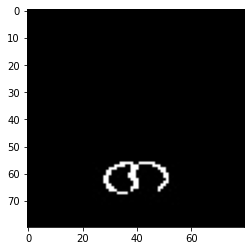

In [10]:
print(lbl_train[2372])
plt.imshow(img_train[2372], cmap='gray')

In [11]:
print(np.max(img_train[0]))
print(np.min(img_train[0]))

255
0


In [12]:
img_train = img_train / 255
img_test = img_test / 255

In [13]:
print(np.max(img_train[0]))
print(np.min(img_train[0]))

1.0
0.0


In [14]:
print(type(img_train[0][0][0][0]))
print(type(img_test[0][0][0][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [15]:
print("Convering to type to float32")
img_train = img_train.astype('float32')
img_test = img_test.astype('float32')

Convering to type to float32


In [16]:
print(type(img_train[0][0][0][0]))

<class 'numpy.float32'>


In [21]:
model = Sequential()
model.add(Conv2D(256, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(1024, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(20, activation='softmax'))



print("Model loaded")

Model loaded


In [22]:
model.compile(optimizer=tensorflow.keras.optimizers.Adadelta(learning_rate=0.1),
             loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [24]:
print("Training....")
model.fit(img_train, lbl_train, epochs=10, batch_size=10, validation_data=(img_test, lbl_test))

Training started
Epoch 1/10
  4/384 [..............................] - ETA: 26:14 - loss: 3.0027 - accuracy: 0.1500

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(img_test, lbl_test)

In [ ]:
print('Test Loss : ', score[0])
print('Test Accuracy :',score[1])

In [ ]:
model.save('test/model.h5')
print("Model saved")